In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import pylab as pt
from scipy import stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("amsterdam_weekdays.csv")
df2 = pd.read_csv("amsterdam_weekends.csv")

In [3]:
# przypisuję wartość 1 dla wynajmu na weekend i 0 dla dni powszednich
df1['weekend'] = 0
df2['weekend'] = 1

In [4]:
# łączę oba zbiry w jeden
df = pd.concat([df1, df2], ignore_index=True)

# Rozpoznawcza analiza danych

In [5]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekend
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,0
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,0
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,0
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,0
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,0


In [6]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'weekend'],
      dtype='object')

In [7]:
# usuwam kolumnę dodatkową kolumnę z indeksami i kolumny, które nie mają opisu
df = df.drop(['Unnamed: 0', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [8]:
# zamieniam kolumnę z cenami na logarytm
df['lSum'] = np.log(df['realSum'])
df = df.drop('realSum', axis=1)

In [9]:
df['lnglat'] = df['lng'] * df['lat']

In [10]:
df.head()

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,weekend,lSum,lnglat
0,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772,0,5.268032,257.145085
1,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432,0,5.841356,256.636787
2,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103,0,5.576333,260.502408
3,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663,0,6.071960,256.340131
4,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508,0,6.185288,256.664603


In [11]:
df['room_type'].value_counts()

room_type
Entire home/apt    1126
Private room        944
Shared room          10
Name: count, dtype: int64

In [12]:
# zamieniam wartości kolumny room_type na kolumny zero-jedynkowe
room_type = pd.get_dummies(df['room_type'], drop_first=False, dtype=int)
room_type = room_type.drop('Shared room', axis=1)
room_type.head()

,Entire home/apt,Private room
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [13]:
# dołączam je do danych a następnie zmieniam ich nazwy i usuwam starą kolumnę
df = pd.concat([df, room_type],axis=1)

In [14]:
df.rename(columns={'Entire home/apt': 'entire_home', 'Private room': 'private_room'}, inplace=True)

In [15]:
df = df.drop('room_type', axis=1)

In [16]:
# zamieniam kolumny z wartościami typu bool na int
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Wykresy

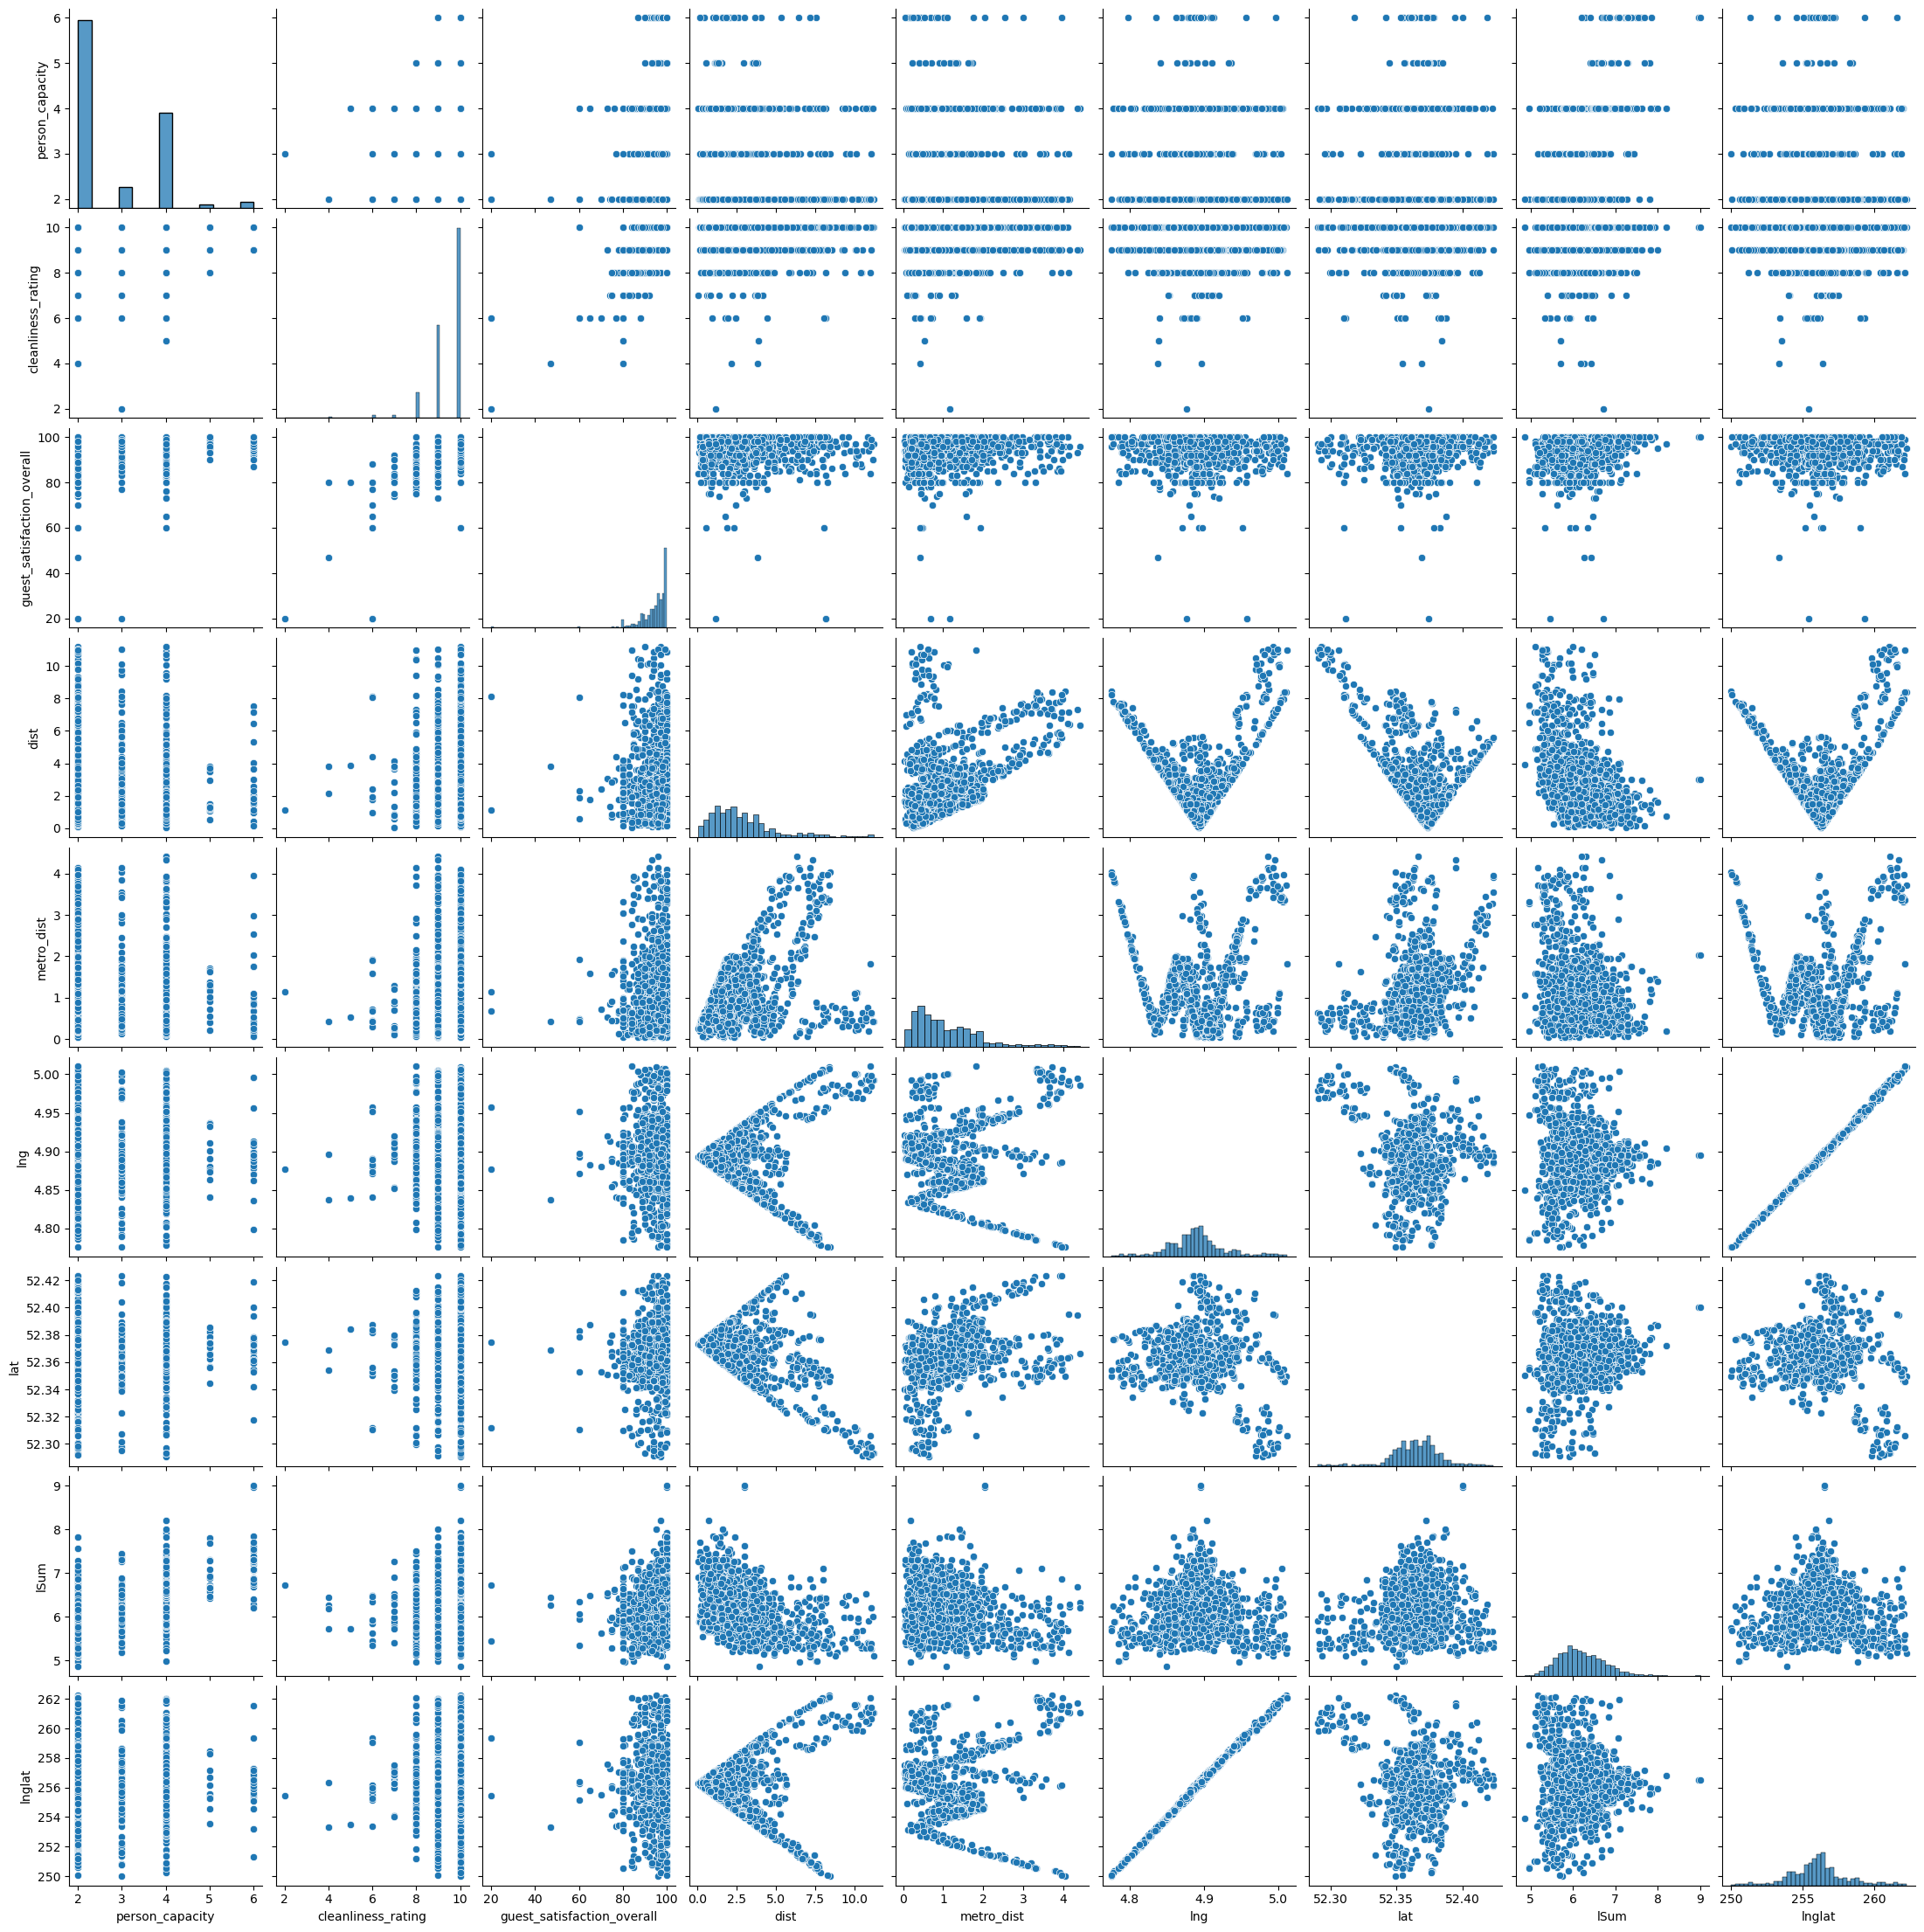

In [17]:
df_ciagle = df.select_dtypes(include='float64')
sns.pairplot(df_ciagle)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25376\661216974.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lSum'], hist=True,kde = False,


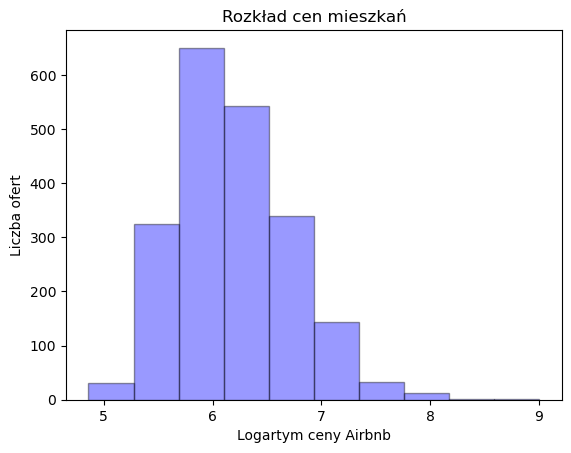

In [18]:
# Histogram logarytmu cen mieszkań
sns.distplot(df['lSum'], hist=True,kde = False, 
             bins=10, color = 'b',
             hist_kws={'edgecolor':'black'})
plt.title('Rozkład cen mieszkań')
plt.xlabel('Logartym ceny Airbnb')
plt.ylabel('Liczba ofert')
# plt.savefig('hist.png')
plt.show()

<Axes: xlabel='lSum'>

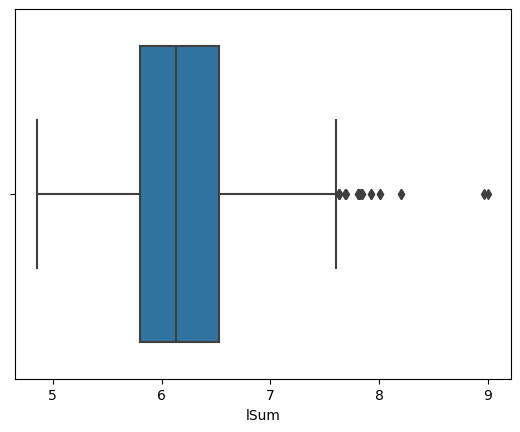

In [19]:
sns.boxplot(x=df['lSum'])

<Axes: xlabel='person_capacity', ylabel='count'>

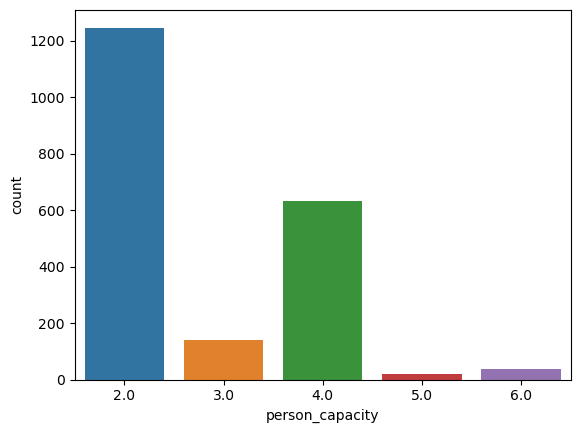

In [20]:
sns.countplot(x = 'person_capacity', data = df)

<Axes: xlabel='person_capacity', ylabel='lSum'>

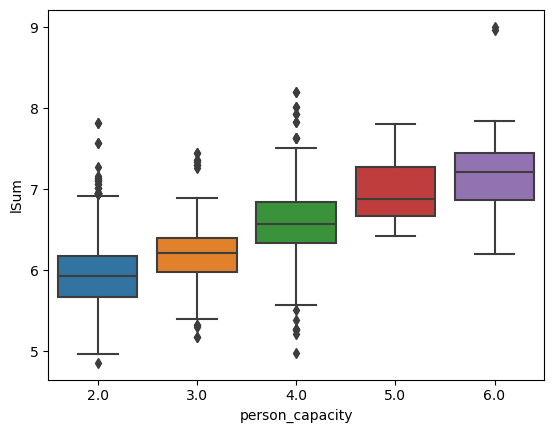

In [21]:
sns.boxplot(x = 'person_capacity', y = 'lSum', data = df)
# plt.savefig('pc_boxplot.png')

<Axes: xlabel='bedrooms', ylabel='count'>

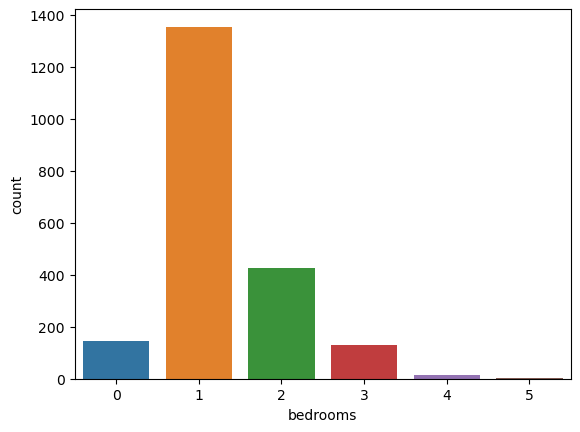

In [22]:
sns.countplot(x = 'bedrooms', data = df)

<Axes: xlabel='bedrooms', ylabel='lSum'>

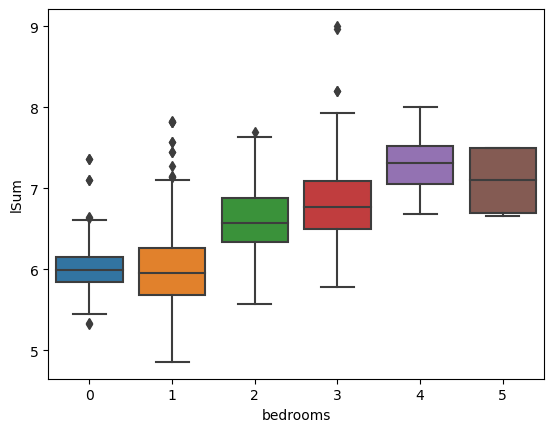

In [23]:
sns.boxplot(x = 'bedrooms', y = 'lSum', data = df)

<Axes: xlabel='cleanliness_rating', ylabel='lSum'>

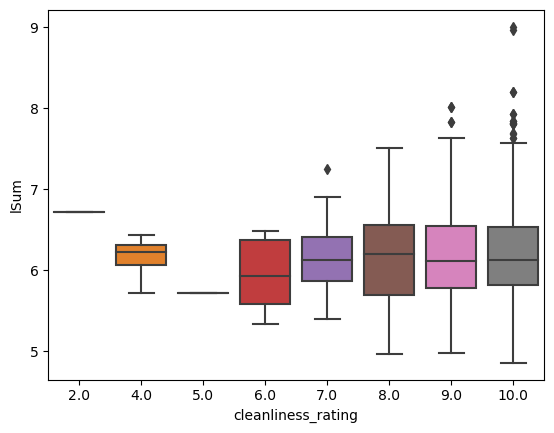

In [24]:
sns.boxplot(x = 'cleanliness_rating', y = 'lSum', data = df)

<Axes: xlabel='weekend', ylabel='lSum'>

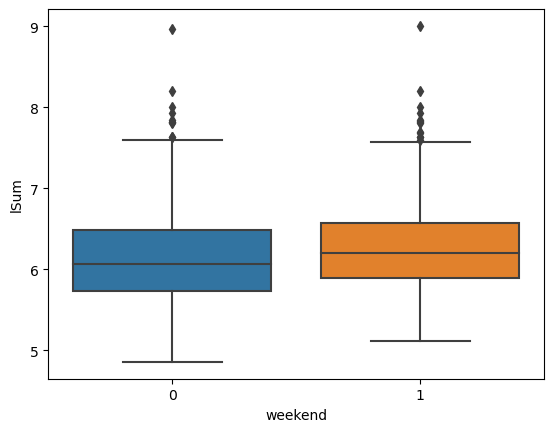

In [25]:
sns.boxplot(x = 'weekend', y = 'lSum', data = df)

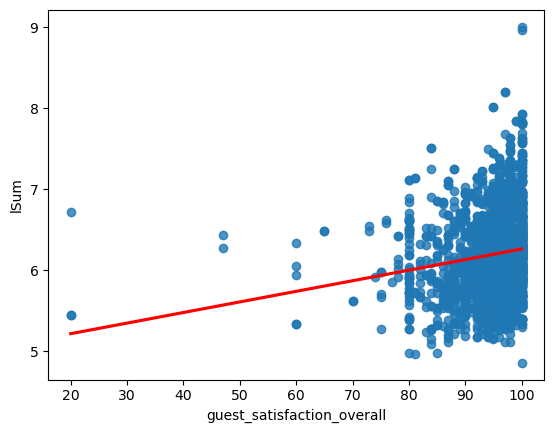

In [26]:
sns.regplot(x= "guest_satisfaction_overall", y="lSum", data=df, ci=None, line_kws= dict(color = "red"))
plt.savefig('gso_regplot.png')
plt.show()

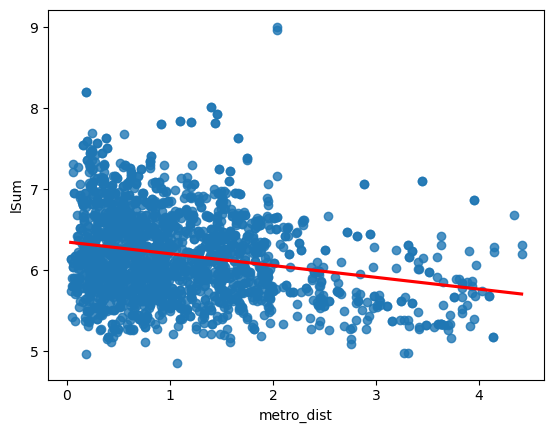

In [27]:
sns.regplot(x= "metro_dist", y="lSum", data=df, ci=None, line_kws= dict(color = "red"))
plt.show()

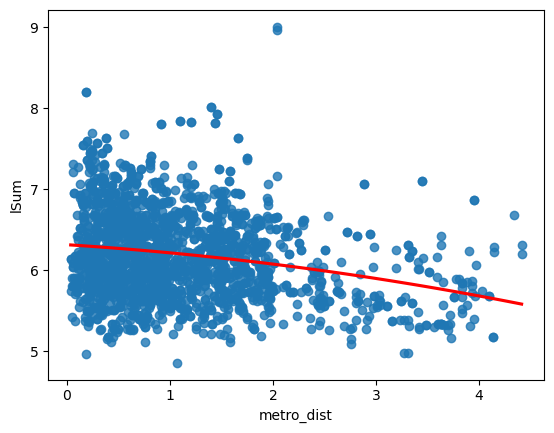

In [28]:
sns.regplot(x= "metro_dist", y="lSum", data=df, ci=None, line_kws= dict(color = "red"), order =2)
plt.show()

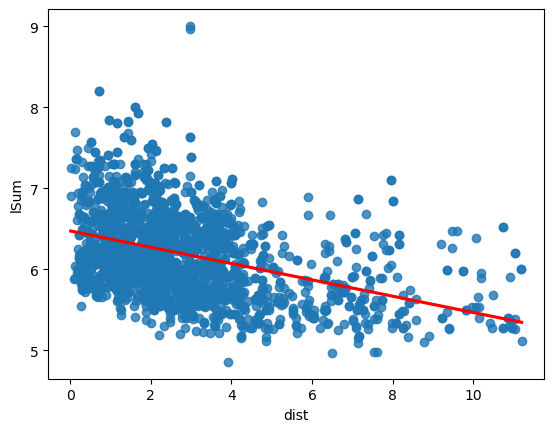

In [29]:
sns.regplot(x= "dist", y="lSum", data=df, ci=None, line_kws= dict(color = "red"))
plt.savefig('dist_regplot.png')
plt.show()

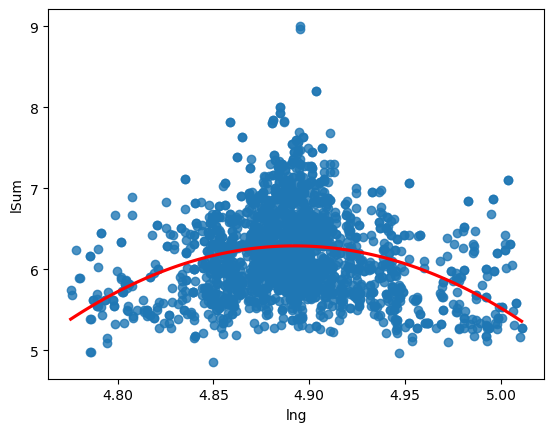

In [30]:
sns.regplot(x= "lng", y="lSum", data=df, ci=None, line_kws= dict(color = "red"), order =2)
plt.show()

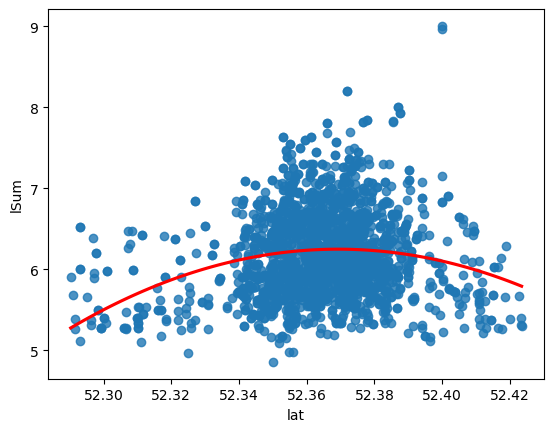

In [31]:
sns.regplot(x= "lat", y="lSum", data=df, ci=None, line_kws= dict(color = "red"), order =2)
plt.show()

# Porządkowanie danych

widzimy zależność kwadratową między szerokośćią i długością geograficzną a cenami
aby się jej pozbyć tworzę zmienną latdist i lngdist które będą odległościami od obszaru z najwyższymi cenami

In [32]:
# dzielę wartości lat na te do 4 miejsc po przecinku i sortuję malejąco
df['lat_rounded'] = df['lat'].round(3)
srednie_wartosci = df.groupby('lat_rounded')['lSum'].mean().reset_index()
srednie_wartosci_sorted = srednie_wartosci.sort_values(by='lSum', ascending=False)
print(srednie_wartosci_sorted)

     lat_rounded      lSum
98        52.400  6.862982
30        52.330  6.533822
85        52.387  6.423037
91        52.393  6.420711
83        52.385  6.407532
..           ...       ...
5         52.296  5.348196
2         52.292  5.327728
11        52.306  5.281229
114       52.416  5.281229
8         52.299  5.281229

[120 rows x 2 columns]


In [33]:
# widzimy najwięsze ceny dla szerokości 41.9383
df['latdist'] = abs(df['lat'] - 52.400)

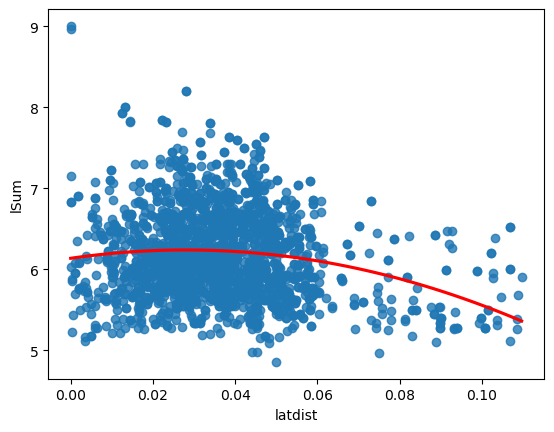

In [34]:
sns.regplot(x= "latdist", y="lSum", data=df, ci=None, line_kws= dict(color = "red"), order =2)
plt.show()

analogicznie dla lng

In [35]:
df['lng_rounded'] = df['lng'].round(2)
srednie_wartosci = df.groupby('lng_rounded')['lSum'].mean().reset_index()
srednie_wartosci_sorted = srednie_wartosci.sort_values(by='lSum', ascending=False)
print(srednie_wartosci_sorted)

    lng_rounded      lSum
10         4.88  6.406054
11         4.89  6.368402
12         4.90  6.339098
13         4.91  6.299360
9          4.87  6.257407
8          4.86  6.118643
14         4.92  6.078972
7          4.85  6.055366
16         4.94  6.037394
6          4.84  6.024334
22         5.00  6.012469
5          4.83  6.008113
15         4.93  5.951871
0          4.78  5.891636
20         4.98  5.825184
2          4.80  5.806125
3          4.81  5.766952
17         4.95  5.764630
4          4.82  5.729615
19         4.97  5.714102
21         4.99  5.669623
1          4.79  5.648564
18         4.96  5.646466
23         5.01  5.471408


In [36]:
df['lngdist'] = abs(df['lng'] - 4.88)

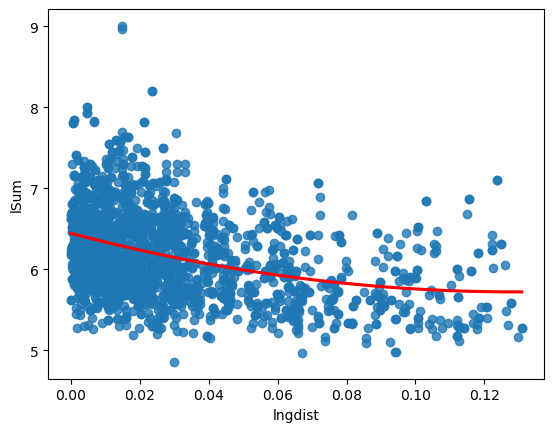

In [37]:
sns.regplot(x= "lngdist", y="lSum", data=df, ci=None, line_kws= dict(color = "red"), order =2)
plt.show()

In [38]:
# dodaję interakcje pomiędzy długością i szerokością geograficzną
df['lnglat'] = df['lng'] * df['lat']

# Analiza ekonometryczna

### Test na łączną nieistotność zmiennych objaśniających w modelu

In [39]:
import statsmodels.formula.api as smf

In [40]:
m1 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + host_is_superhost + multi + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + lng + lat + lnglat + latdist + lngdist + weekend + entire_home + private_room', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     261.4
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:51   Log-Likelihood:                -447.36
No. Observations:                2080   AIC:                             930.7
Df Residuals:                    2062   BIC:                             1032.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5803.8684   1576.951     -3.680      0.000   -8896.451   -2711.286
room_shared                -2321.8233    630.781     -3.681      0.000   -3558.858   -1084.788
room_private               -1160.7965    315.390     -3.681      0.000   -1779.312    -542.281
person_capacity                0.1846      0.009     20.947      0.000       0.167       0.202
host_is_superhost              0.0106      0.016      0.670      0.503      -0.020       0.042
multi                         -0.0209      0.016     -1.324      0.186      -0.052       0.010
biz                            0.0042      0.023      0.181      0.856      -0.041       0.050
cleanliness_rating             0.0078      0.011      0.700      0.484      -0.014       0.029
guest_satisfaction_overall     0.0040      0.001      2.734      0.006       0.001       0.007
bedrooms                       0.1436      0.012     11.634      0.000       0.119       0.168
dist                          -0.1035      0.010    -10.356      0.000      -0.123      -0.084
metro_dist                     0.0033      0.012      0.282      0.778      -0.020       0.026
lng                         1716.2448    447.187      3.838      0.000     839.259    2593.230
lat                          155.2401     42.170      3.681      0.000      72.539     237.941
lnglat                       -32.7687      8.542     -3.836      0.000     -49.520     -16.017
latdist                       -2.6038      2.380     -1.094      0.274      -7.271       2.064
lngdist                       -0.3070      0.627     -0.490      0.624      -1.537       0.923
weekend                        0.0701      0.013      5.237      0.000       0.044       0.096
entire_home                -2321.2487    630.780     -3.680      0.000   -3558.281   -1084.217
private_room               -1160.7965    315.390     -3.681      0.000   -1779.312    -542.281
==============================================================================
Omnibus:                      402.075   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.781
Skew:                           0.996   Prob(JB):                    3.20e-253
Kurtosis:                       6.074   Cond. No.                     2.77e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
#usuwam zmienną Loudness
hip1 = '(biz = 0)'
m1.f_test(hip1)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.0329073254570081, p=0.8560684939188211, df_denom=2.06e+03, df_num=1>

In [42]:
m2 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + host_is_superhost + multi + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + lng + lat + lnglat + latdist + lngdist + weekend + entire_home + private_room', data = df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     277.8
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:51   Log-Likelihood:                -447.37
No. Observations:                2080   AIC:                             928.7
Df Residuals:                    2063   BIC:                             1025.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5804.1822   1576.580     -3.682      0.000   -8896.037   -2712.327
room_shared                -2321.9489    630.633     -3.682      0.000   -3558.693   -1085.205
room_private               -1160.8591    315.315     -3.682      0.000   -1779.229    -542.489
person_capacity                0.1847      0.009     21.128      0.000       0.168       0.202
host_is_superhost              0.0103      0.016      0.656      0.512      -0.021       0.041
multi                         -0.0216      0.015     -1.416      0.157      -0.052       0.008
cleanliness_rating             0.0079      0.011      0.713      0.476      -0.014       0.030
guest_satisfaction_overall     0.0039      0.001      2.730      0.006       0.001       0.007
bedrooms                       0.1434      0.012     11.652      0.000       0.119       0.168
dist                          -0.1036      0.010    -10.399      0.000      -0.123      -0.084
metro_dist                     0.0032      0.012      0.272      0.785      -0.020       0.026
lng                         1716.2585    447.082      3.839      0.000     839.479    2593.038
lat                          155.2485     42.161      3.682      0.000      72.567     237.930
lnglat                       -32.7690      8.540     -3.837      0.000     -49.517     -16.021
latdist                       -2.6011      2.379     -1.093      0.274      -7.267       2.065
lngdist                       -0.2959      0.624     -0.474      0.635      -1.520       0.928
weekend                        0.0700      0.013      5.235      0.000       0.044       0.096
entire_home                -2321.3743    630.632     -3.681      0.000   -3558.115   -1084.633
private_room               -1160.8591    315.315     -3.682      0.000   -1779.229    -542.489
==============================================================================
Omnibus:                      401.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1159.991
Skew:                           0.995   Prob(JB):                    1.29e-252
Kurtosis:                       6.070   Cond. No.                     2.77e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
#usuwam zmienną Loudness
hip2 = '(metro_dist = 0)'
m2.f_test(hip2)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.07411115253716527, p=0.7854696231553011, df_denom=2.06e+03, df_num=1>

In [44]:
m3 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + host_is_superhost + multi + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + lng + lat + lnglat + latdist + lngdist + weekend + entire_home + private_room', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     296.5
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:51   Log-Likelihood:                -447.41
No. Observations:                2080   AIC:                             926.8
Df Residuals:                    2064   BIC:                             1017.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5687.8840   1517.258     -3.749      0.000   -8663.400   -2712.368
room_shared                -2275.4299    606.905     -3.749      0.000   -3465.639   -1085.221
room_private               -1137.5994    303.451     -3.749      0.000   -1732.701    -542.497
person_capacity                0.1847      0.009     21.134      0.000       0.168       0.202
host_is_superhost              0.0103      0.016      0.657      0.511      -0.021       0.041
multi                         -0.0218      0.015     -1.425      0.154      -0.052       0.008
cleanliness_rating             0.0079      0.011      0.717      0.474      -0.014       0.030
guest_satisfaction_overall     0.0039      0.001      2.735      0.006       0.001       0.007
bedrooms                       0.1434      0.012     11.656      0.000       0.119       0.168
dist                          -0.1027      0.009    -10.914      0.000      -0.121      -0.084
lng                         1682.5084    429.453      3.918      0.000     840.301    2524.715
lat                          152.1385     40.574      3.750      0.000      72.568     231.709
lnglat                       -32.1243      8.203     -3.916      0.000     -48.212     -16.037
latdist                       -2.6407      2.374     -1.112      0.266      -7.297       2.016
lngdist                       -0.2828      0.622     -0.455      0.649      -1.503       0.937
weekend                        0.0700      0.013      5.240      0.000       0.044       0.096
entire_home                -2274.8547    606.903     -3.748      0.000   -3465.060   -1084.650
private_room               -1137.5994    303.451     -3.749      0.000   -1732.701    -542.497
==============================================================================
Omnibus:                      401.831   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1161.226
Skew:                           0.996   Prob(JB):                    6.97e-253
Kurtosis:                       6.072   Cond. No.                     2.77e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
#usuwam zmienną Loudness
hip3 = '(lngdist = 0)'
m3.f_test(hip3)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.20678132080730605, p=0.6493497755737029, df_denom=2.06e+03, df_num=1>

In [46]:
m4 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + host_is_superhost + multi + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + lng + lat + lnglat + latdist + weekend + entire_home + private_room', data = df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     317.8
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:51   Log-Likelihood:                -447.51
No. Observations:                2080   AIC:                             925.0
Df Residuals:                    2065   BIC:                             1010.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5867.5619   1464.623     -4.006      0.000   -8739.854   -2995.269
room_shared                -2347.3013    585.851     -4.007      0.000   -3496.221   -1198.382
room_private               -1173.5351    292.924     -4.006      0.000   -1747.992    -599.078
person_capacity                0.1845      0.009     21.139      0.000       0.167       0.202
host_is_superhost              0.0106      0.016      0.675      0.500      -0.020       0.041
multi                         -0.0219      0.015     -1.434      0.152      -0.052       0.008
cleanliness_rating             0.0078      0.011      0.710      0.478      -0.014       0.029
guest_satisfaction_overall     0.0039      0.001      2.738      0.006       0.001       0.007
bedrooms                       0.1436      0.012     11.677      0.000       0.119       0.168
dist                          -0.1065      0.004    -24.939      0.000      -0.115      -0.098
lng                         1728.6974    417.188      4.144      0.000     910.544    2546.851
lat                          156.9479     39.164      4.007      0.000      80.143     233.753
lnglat                       -33.0076      7.968     -4.142      0.000     -48.634     -17.381
latdist                       -2.0367      1.968     -1.035      0.301      -5.896       1.822
weekend                        0.0701      0.013      5.248      0.000       0.044       0.096
entire_home                -2346.7254    585.849     -4.006      0.000   -3495.641   -1197.809
private_room               -1173.5351    292.924     -4.006      0.000   -1747.992    -599.078
==============================================================================
Omnibus:                      404.698   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1181.626
Skew:                           0.999   Prob(JB):                    2.59e-257
Kurtosis:                       6.105   Cond. No.                     2.77e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
#usuwam zmienną Loudness
hip4 = '(cleanliness_rating = 0), (host_is_superhost = 0)'
m4.f_test(hip4)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.5563738670501113, p=0.5733700169584568, df_denom=2.06e+03, df_num=2>

In [48]:
m5 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + multi + guest_satisfaction_overall + bedrooms + dist + lng + lat + lnglat + latdist + weekend + entire_home + private_room', data = df).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     370.8
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:51   Log-Likelihood:                -448.07
No. Observations:                2080   AIC:                             922.1
Df Residuals:                    2067   BIC:                             995.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5937.0480   1462.802     -4.059      0.000   -8805.767   -3068.329
room_shared                -2375.0959    585.122     -4.059      0.000   -3522.586   -1227.606
room_private               -1187.4313    292.560     -4.059      0.000   -1761.174    -613.689
person_capacity                0.1843      0.009     21.141      0.000       0.167       0.201
multi                         -0.0212      0.015     -1.390      0.165      -0.051       0.009
guest_satisfaction_overall     0.0048      0.001      4.567      0.000       0.003       0.007
bedrooms                       0.1433      0.012     11.661      0.000       0.119       0.167
dist                          -0.1066      0.004    -24.972      0.000      -0.115      -0.098
lng                         1748.0108    416.689      4.195      0.000     930.836    2565.185
lat                          158.8065     39.115      4.060      0.000      82.097     235.516
lnglat                       -33.3766      7.959     -4.194      0.000     -48.985     -17.769
latdist                       -1.9678      1.966     -1.001      0.317      -5.824       1.888
weekend                        0.0701      0.013      5.247      0.000       0.044       0.096
entire_home                -2374.5208    585.120     -4.058      0.000   -3522.007   -1227.034
private_room               -1187.4313    292.560     -4.059      0.000   -1761.174    -613.689
==============================================================================
Omnibus:                      401.378   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1163.734
Skew:                           0.993   Prob(JB):                    1.99e-253
Kurtosis:                       6.079   Cond. No.                     2.76e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
#usuwam zmienną Loudness
hip5 = '(latdist = 0)'
m5.f_test(hip5)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.0015254830397637, p=0.3170588057277189, df_denom=2.07e+03, df_num=1>

In [50]:
m6 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + multi + guest_satisfaction_overall + bedrooms + dist + lng + lat + lnglat + weekend + entire_home + private_room', data = df).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     404.4
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:51   Log-Likelihood:                -448.58
No. Observations:                2080   AIC:                             921.2
Df Residuals:                    2068   BIC:                             988.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5999.3933   1461.475     -4.105      0.000   -8865.510   -3133.277
room_shared                -2400.0331    584.591     -4.105      0.000   -3546.482   -1253.584
room_private               -1199.9008    292.294     -4.105      0.000   -1773.123    -626.679
person_capacity                0.1845      0.009     21.168      0.000       0.167       0.202
multi                         -0.0215      0.015     -1.412      0.158      -0.051       0.008
guest_satisfaction_overall     0.0048      0.001      4.570      0.000       0.003       0.007
bedrooms                       0.1430      0.012     11.636      0.000       0.119       0.167
dist                          -0.1084      0.004    -27.795      0.000      -0.116      -0.101
lng                         1747.7388    416.689      4.194      0.000     930.564    2564.913
lat                          160.4736     39.080      4.106      0.000      83.834     237.114
lnglat                       -33.3717      7.959     -4.193      0.000     -48.980     -17.764
weekend                        0.0707      0.013      5.301      0.000       0.045       0.097
entire_home                -2399.4595    584.590     -4.105      0.000   -3545.905   -1253.014
private_room               -1199.9008    292.294     -4.105      0.000   -1773.123    -626.679
==============================================================================
Omnibus:                      407.272   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1198.919
Skew:                           1.002   Prob(JB):                    4.55e-261
Kurtosis:                       6.133   Cond. No.                     2.76e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
#usuwam zmienną Loudness
hip6 = '(multi = 0)'
m6.f_test(hip6)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.9926998687078998, p=0.15820930739331257, df_denom=2.07e+03, df_num=1>

In [52]:
m7 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + guest_satisfaction_overall + bedrooms + dist + lng + lat + lnglat + weekend + entire_home + private_room', data = df).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     444.5
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:52   Log-Likelihood:                -449.58
No. Observations:                2080   AIC:                             921.2
Df Residuals:                    2069   BIC:                             983.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6039.7288   1461.546     -4.132      0.000   -8905.984   -3173.474
room_shared                -2416.1719    584.620     -4.133      0.000   -3562.676   -1269.667
room_private               -1207.9680    292.309     -4.133      0.000   -1781.218    -634.718
person_capacity                0.1851      0.009     21.243      0.000       0.168       0.202
guest_satisfaction_overall     0.0049      0.001      4.581      0.000       0.003       0.007
bedrooms                       0.1426      0.012     11.604      0.000       0.118       0.167
dist                          -0.1082      0.004    -27.766      0.000      -0.116      -0.101
lng                         1759.0545    416.712      4.221      0.000     941.836    2576.273
lat                          161.5513     39.082      4.134      0.000      84.908     238.195
lnglat                       -33.5877      7.959     -4.220      0.000     -49.197     -17.979
weekend                        0.0714      0.013      5.350      0.000       0.045       0.098
entire_home                -2415.5889    584.618     -4.132      0.000   -3562.090   -1269.088
private_room               -1207.9680    292.309     -4.133      0.000   -1781.218    -634.718
==============================================================================
Omnibus:                      401.251   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1157.755
Skew:                           0.995   Prob(JB):                    3.95e-252
Kurtosis:                       6.066   Cond. No.                     2.76e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
# stargazer = Stargazer([m1, m2, m3,m4,m5,m6,m7])
# stargazer.save("stargazer1.png")

In [54]:
Stargazer([m1, m2, m3,m4,m5,m6,m7])

Wszystkie zmienne wychodzą istotne zatem testujemy liniowość formy funkcjyjnej

In [55]:
res = sm.OLS(m7.model.endog,m7.model.exog).fit()
sms.linear_reset(res, power=3, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=31.890835295432794, p-value=1.1884833556777473e-07, df_denom=2>

p-value < 0 odzrzucamy H0 o liniowości formy funkjcyjnej.

 dodaję interakcje aby naprawić ten problem

In [56]:
df['lng2'] = df['lng'] **2
df['lat2'] = df['lat'] **2
df['lngl'] = np.log(df['lng'])
df['latl'] = np.log(df['lat'])
df['lnglat2'] = df['lnglat'] **2
df['lnglatdist'] = df['lngdist'] * df['latdist']
df['metro_dist2'] = df['metro_dist'] **2
df['metroxdist'] = df['dist'] * df['metro_dist']
df['bedxcapacity'] = df['person_capacity'] * df['bedrooms']
df['distll'] = df['lnglat'] * df['dist']
df['guest_satisfaction_overall2'] = df['guest_satisfaction_overall'] **2
df['cleanliness_rating2'] = df['cleanliness_rating'] **2

In [57]:
df.columns

Index(['room_shared', 'room_private', 'person_capacity', 'host_is_superhost',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist', 'metro_dist', 'lng', 'lat', 'weekend', 'lSum',
       'lnglat', 'entire_home', 'private_room', 'lat_rounded', 'latdist',
       'lng_rounded', 'lngdist', 'lng2', 'lat2', 'lngl', 'latl', 'lnglat2',
       'lnglatdist', 'metro_dist2', 'metroxdist', 'bedxcapacity', 'distll',
       'guest_satisfaction_overall2', 'cleanliness_rating2'],
      dtype='object')

In [58]:
m1 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + host_is_superhost + multi + biz + cleanliness_rating + guest_satisfaction_overall + bedrooms + dist + metro_dist + lng + lat + weekend + lnglat + entire_home + private_room + lat_rounded + latdist + lng_rounded + lngdist + lng2 + lat2 + lnglat2 + lnglatdist + metro_dist2 + metroxdist + bedxcapacity + distll + lngl + latl + guest_satisfaction_overall2 + cleanliness_rating2', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     162.6
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:52   Log-Likelihood:                -375.45
No. Observations:                2080   AIC:                             812.9
Df Residuals:                    2049   BIC:                             987.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.643e+05   1.02e+05     -1.607      0.108   -3.65e+05    3.62e+04
room_shared                  -6.57e+04   4.09e+04     -1.607      0.108   -1.46e+05    1.45e+04
room_private                -3.285e+04   2.04e+04     -1.607      0.108   -7.29e+04    7247.297
person_capacity                 0.1292      0.016      8.116      0.000       0.098       0.160
host_is_superhost              -0.0085      0.016     -0.540      0.589      -0.039       0.022
multi                          -0.0303      0.015     -1.966      0.049      -0.061   -7.21e-05
biz                            -0.0186      0.023     -0.815      0.415      -0.064       0.026
cleanliness_rating             -0.0951      0.084     -1.138      0.255      -0.259       0.069
guest_satisfaction_overall     -0.0209      0.007     -2.794      0.005      -0.036      -0.006
bedrooms                        0.0022      0.036      0.061      0.951      -0.069       0.074
dist                            0.8731      1.868      0.467      0.640      -2.789       4.536
metro_dist                     -0.0559      0.033     -1.672      0.095      -0.121       0.010
lng                          3.364e+05   2.02e+05      1.665      0.096   -5.99e+04    7.33e+05
lat                          4.611e+04   2.87e+04      1.604      0.109   -1.03e+04    1.02e+05
weekend                         0.0683      0.013      5.258      0.000       0.043       0.094
lnglat                      -6477.9317   4026.457     -1.609      0.108   -1.44e+04    1418.443
entire_home                  -6.57e+04   4.09e+04     -1.607      0.108   -1.46e+05    1.45e+04
private_room                -3.285e+04   2.04e+04     -1.607      0.108   -7.29e+04    7247.284
lat_rounded                    -5.5230     23.085     -0.239      0.811     -50.795      39.749
latdist                        -3.8645      3.204     -1.206      0.228     -10.148       2.419
lng_rounded                    -2.0143      2.249     -0.896      0.371      -6.425       2.396
lngdist                        -9.9983      2.134     -4.685      0.000     -14.184      -5.813
lng2                        -1.719e+04   1.03e+04     -1.663      0.096   -3.75e+04    3076.381
lat2                         -216.0074    138.231     -1.563      0.118    -487.095      55.080
lnglat2                         6.3350      3.932      1.611      0.107      -1.377      14.047
lnglatdist                    102.1443     45.118      2.264      0.024      13.662     190.627
metro_dist2                    -0.0161      0.012     -1.346      0.179      -0.040       0.007
metroxdist                      0.0145      0.009      1.572      0.116      -0.004       0.033
bedxcapacity                    0.0392      0.010      4.011      0.000       0.020       0.058
distll     

tak jak w poprzednim kroku usuwam zmienne nieistotne i dosjaę model m2

In [59]:
m2 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + multi + guest_satisfaction_overall + dist + metro_dist + lng + weekend + lnglat + lngdist + lnglat2 + lnglatdist + bedxcapacity + distll + guest_satisfaction_overall2', data = df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:52   Log-Likelihood:                -379.76
No. Observations:                2080   AIC:                             793.5
Df Residuals:                    2063   BIC:                             889.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1974.5431    222.869      8.860      0.000    1537.472    2411.614
room_shared                    -0.5878      0.094     -6.279      0.000      -0.771      -0.404
room_private                   -0.3543      0.015    -23.983      0.000      -0.383      -0.325
person_capacity                 0.1272      0.012     11.042      0.000       0.105       0.150
multi                          -0.0272      0.015     -1.844      0.065      -0.056       0.002
guest_satisfaction_overall     -0.0269      0.006     -4.386      0.000      -0.039      -0.015
dist                            0.8676      0.491      1.768      0.077      -0.095       1.830
metro_dist                     -0.0526      0.013     -4.182      0.000      -0.077      -0.028
lng                            12.4707      6.557      1.902      0.057      -0.389      25.330
weekend                         0.0687      0.013      5.310      0.000       0.043       0.094
lnglat                        -15.6541      1.744     -8.975      0.000     -19.075     -12.233
lngdist                        -8.0479      1.041     -7.732      0.000     -10.089      -6.007
lnglat2                         0.0302      0.003      8.815      0.000       0.023       0.037
lnglatdist                     40.0746     12.168      3.293      0.001      16.211      63.938
bedxcapacity                    0.0401      0.003     12.524      0.000       0.034       0.046
distll                         -0.0038      0.002     -2.005      0.045      -0.008   -8.36e-05
guest_satisfaction_overall2     0.0002   3.68e-05      5.215      0.000       0.000       0.000
==============================================================================
Omnibus:                      410.573   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1244.381
Skew:                           1.000   Prob(JB):                    6.11e-271
Kurtosis:                       6.218   Cond. No.                     2.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
Stargazer([m1, m2])

### Test na łączną nieistotność zmiennych objaśniających w modelu

Wniosek: p-value = 0 < 0.1

odrzucam H0 o łącznej nieistotności zmiennych, więc co najmniej jedna zmienna w modelu jest istotna

### Analiza korelacji zmiennych

<Axes: >

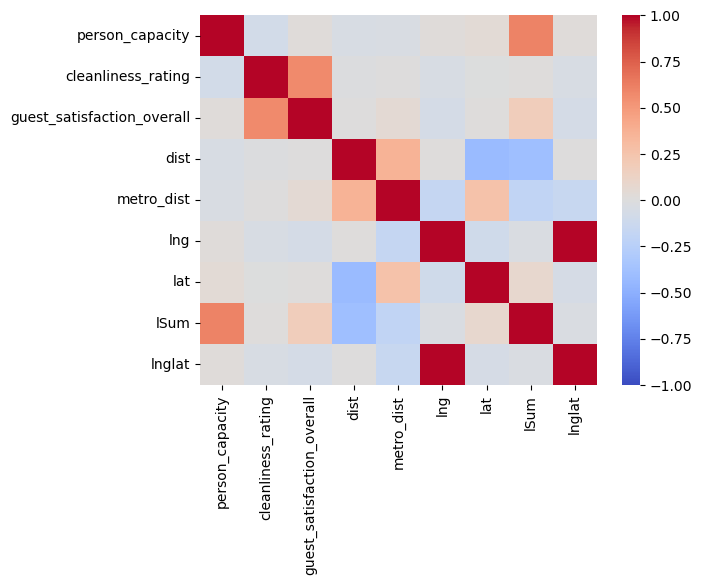

In [61]:
sns.heatmap(df_ciagle.corr(method = 'spearman'), vmin = -1, vmax = 1, cmap = 'coolwarm')
# plt.savefig('corr.png')

In [62]:
df.corr(method = 'spearman').style.background_gradient()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,weekend,lSum,lnglat,entire_home,private_room,lat_rounded,latdist,lng_rounded,lngdist,lng2,lat2,lngl,latl,lnglat2,lnglatdist,metro_dist2,metroxdist,bedxcapacity,distll,guest_satisfaction_overall2,cleanliness_rating2
room_shared,1.000000,-0.063359,0.015344,0.017856,0.048877,-0.023843,-0.028351,-0.032297,-0.029654,0.031323,0.007594,0.010922,0.002570,-0.009708,-0.082002,0.011888,-0.075511,-0.063359,0.002761,-0.003322,0.010465,0.034154,0.010922,0.002570,0.010922,0.002570,0.011888,0.013833,0.007594,0.027793,0.007041,0.031312,-0.032297,-0.028351
room_private,-0.063359,1.000000,-0.337944,0.153685,0.256525,0.102592,0.016377,-0.177529,-0.369276,0.053246,0.011105,0.070572,-0.022051,-0.113012,-0.604097,0.073225,-0.990357,1.000000,-0.022181,0.025496,0.072953,0.102253,0.070572,-0.022051,0.070572,-0.022051,0.073225,0.081191,0.011105,0.034342,-0.363295,0.054079,-0.177529,0.016377
person_capacity,0.015344,-0.337944,1.000000,-0.067036,-0.132613,0.057114,-0.082361,0.019899,0.689193,-0.040394,-0.032112,0.018290,0.043750,-0.008832,0.606352,0.019295,0.335528,-0.337944,0.044180,-0.044520,0.017901,-0.029592,0.018290,0.043750,0.018290,0.043750,0.019295,-0.037354,-0.032112,-0.041933,0.879663,-0.040423,0.019899,-0.082361
host_is_superhost,0.017856,0.153685,-0.067036,1.000000,0.084338,-0.111925,0.330418,0.285383,-0.037049,0.015297,0.016327,-0.033024,0.008823,-0.020504,-0.090983,-0.032751,-0.156034,0.153685,0.008153,-0.007276,-0.037225,-0.022623,-0.033024,0.008823,-0.033024,0.008823,-0.032751,-0.019826,0.016327,0.014364,-0.047070,0.015194,0.285383,0.330418
multi,0.048877,0.256525,-0.132613,0.084338,1.000000,-0.215609,0.014226,-0.053063,-0.096488,-0.000191,-0.036110,-0.007073,-0.028827,-0.059141,-0.203679,-0.006449,-0.263093,0.256525,-0.029299,0.029749,-0.009804,0.013602,-0.007073,-0.028827,-0.007073,-0.028827,-0.006449,0.027896,-0.036110,-0.032594,-0.118238,-0.000307,-0.053063,0.014226
biz,-0.023843,0.102592,0.057114,-0.111925,-0.215609,1.000000,-0.051160,-0.136590,-0.058887,-0.107077,-0.071424,0.093425,0.076410,-0.034106,0.018737,0.095912,-0.099195,0.102592,0.077232,-0.077921,0.096520,0.022593,0.093425,0.076410,0.093425,0.076410,0.095912,-0.021988,-0.071424,-0.108212,-0.010628,-0.106430,-0.136590,-0.051160
cleanliness_rating,-0.028351,0.016377,-0.082361,0.330418,0.014226,-0.051160,1.000000,0.571074,-0.001727,-0.010309,0.002166,-0.045092,-0.000778,0.013130,0.015340,-0.044534,-0.012427,0.016377,-0.001223,0.001806,-0.044206,-0.033404,-0.045092,-0.000778,-0.045092,-0.000778,-0.044534,-0.029834,0.002166,-0.005666,-0.030400,-0.010450,0.571074,1.000000
guest_satisfaction_overall,-0.032297,-0.177529,0.019899,0.285383,-0.053063,-0.136590,0.571074,1.000000,0.126669,0.004273,0.049782,-0.066395,0.015113,0.054490,0.176734,-0.065396,0.181862,-0.177529,0.015044,-0.015303,-0.067720,-0.031056,-0.066395,0.015113,-0.066395,0.015113,-0.065396,-0.032248,0.049782,0.033605,0.087084,0.003956,1.000000,0.571074
bedrooms,-0.029654,-0.369276,0.689193,-0.037049,-0.096488,-0.058887,-0.001727,0.126669,1.000000,0.040223,-0.015454,-0.020338,-0.039254,0.016837,0.539168,-0.021735,0.373079,-0.369276,-0.039372,0.038349,-0.022295,0.000589,-0.020338,-0.039254,-0.020338,-0.039254,-0.021735,0.017900,-0.015454,0.018701,0.916937,0.039701,0.126669,-0.001727
dist,0.031323,0.053246,-0.040394,0.015297,-0.000191,-0.107077,-0.010309,0.004273,0.040223,1.000000,0.364947,0.013071,-0.422657,0.002088,-0.393256,0.007165,-0.057549,0.053246,-0.422987,0.428523,0.012727,0.708821,0.013071,-0.422657,0.013071,-0.422657,0.007165,0.678238,0.364947,0.782546,0.015026,0.999939,0.004273,-0.010309


In [63]:
df['clrat_gusaov'] = df['cleanliness_rating'] * df['guest_satisfaction_overall']

In [64]:
m3 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + multi + guest_satisfaction_overall + dist + metro_dist + lng + weekend + lnglat + lngdist + lnglat2 + lnglatdist + bedxcapacity + distll + guest_satisfaction_overall2 + clrat_gusaov', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     287.1
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:15:53   Log-Likelihood:                -379.68
No. Observations:                2080   AIC:                             795.4
Df Residuals:                    2062   BIC:                             896.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1976.2842    222.956      8.864      0.000    1539.042    2413.527
room_shared                    -0.5871      0.094     -6.270      0.000      -0.771      -0.403
room_private                   -0.3549      0.015    -23.884      0.000      -0.384      -0.326
person_capacity                 0.1273      0.012     11.047      0.000       0.105       0.150
multi                          -0.0274      0.015     -1.853      0.064      -0.056       0.002
guest_satisfaction_overall     -0.0269      0.006     -4.388      0.000      -0.039      -0.015
dist                            0.8632      0.491      1.758      0.079      -0.100       1.826
metro_dist                     -0.0527      0.013     -4.188      0.000      -0.077      -0.028
lng                            12.5024      6.559      1.906      0.057      -0.361      25.366
weekend                         0.0687      0.013      5.311      0.000       0.043       0.094
lnglat                        -15.6683      1.745     -8.979      0.000     -19.090     -12.246
lngdist                        -8.0405      1.041     -7.723      0.000     -10.082      -5.999
lnglat2                         0.0302      0.003      8.819      0.000       0.024       0.037
lnglatdist                     39.7469     12.198      3.258      0.001      15.825      63.669
bedxcapacity                    0.0401      0.003     12.521      0.000       0.034       0.046
distll                         -0.0038      0.002     -1.995      0.046      -0.008   -6.43e-05
guest_satisfaction_overall2     0.0002   3.85e-05      4.872      0.000       0.000       0.000
clrat_gusaov                 4.788e-05      0.000      0.402      0.688      -0.000       0.000
==============================================================================
Omnibus:                      410.354   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1243.985
Skew:                           1.000   Prob(JB):                    7.45e-271
Kurtosis:                       6.218   Cond. No.                     2.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

interakcja nieistotna

## Testowanie założen KMRL

### 1. Prawidłowość formy funkcyjnej

##### TEST RESET

In [65]:
res = sm.OLS(m2.model.endog,m2.model.exog).fit()
sms.linear_reset(res, power=3, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=4.2624758051061065, p-value=0.11869027587868854, df_denom=2>

p-value = 0.12 > 0.1 zatem przyjmujemy H0 mówiące o liniowości formy funkcyjnej

##### TEST CHOW'A

In [66]:
m2.ssr

175.4582337569621

In [67]:
m2_1 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + multi + guest_satisfaction_overall + dist + metro_dist + lng + weekend + lnglat + lngdist + lnglat2 + lnglatdist + bedxcapacity + distll + guest_satisfaction_overall2', data = df[df['weekend'] == 0]).fit()

In [68]:
m2_1.ssr

92.69205647129748

In [69]:
m2_2 = smf.ols(formula = 'lSum ~ room_shared + room_private + person_capacity + multi + guest_satisfaction_overall + dist + metro_dist + lng + weekend + lnglat + lngdist + lnglat2 + lnglatdist + bedxcapacity + distll + guest_satisfaction_overall2', data = df[df['weekend'] == 1]).fit()

In [70]:
m2_2.ssr

81.41905022162743

In [71]:
m2.nobs

2080.0

In [72]:
len(m2.params)

17

In [73]:
licznik = (m2.ssr - m2_1.ssr - m2_2.ssr)/len(m2.params)*(2-1)

In [74]:
mianownik = (m2_1.ssr + m2_2.ssr)/(m1.nobs - 2*len(m2.params))

In [75]:
F = licznik/mianownik
F

0.931191050213963

In [76]:
import scipy.stats

In [77]:
scipy.stats.f.ppf(q = 1-0.05, dfn = 3, dfd = 25)

2.991240909549952

wartość statystyki F < wartość krytyczna, zatem statystyka F nie wpada do obszaru krytycznego i potwierdzam H0 o stabilności parametrów modelu

### 2. Homoskedastyczność składnika losowego

##### GRAFICZNIE

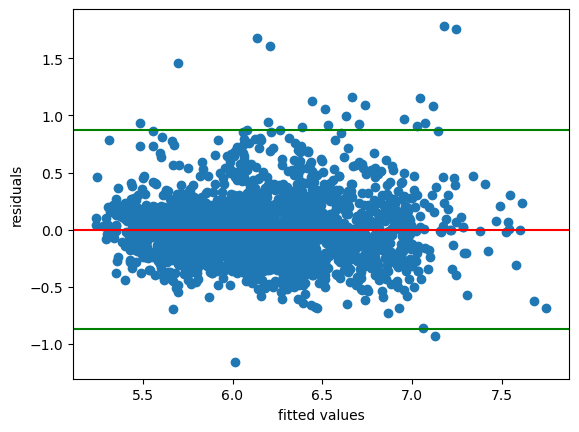

In [78]:
plt.scatter(m2.fittedvalues, m2.resid)
plt.axhline(y = 0, color = 'red')
plt.axhline(y=0 + 3*m2.resid.std(), color = 'green')
plt.axhline(y=0 - 3*m2.resid.std(), color = 'green')
plt.xlabel('fitted values')
plt.ylabel('residuals')
# plt.savefig('homo.png')
plt.show()

##### TEST GOLDFELDA-QUANDTA

In [79]:
test3 = sms.het_goldfeldquandt(m2.resid,  m2.model.exog)
test3

(1.0822612714001358, 0.10310759860368043, 'increasing')

p-value = 0.103 > 0.1, przyjmuje H0 o homoskedastyczności

### 3. Brak autokorelacji reszt

##### TEST BREAUSCHA-GODFREYA

In [80]:
# autokorelacja reszt
test_bg = sms.acorr_breusch_godfrey(m2)
test_bg

(13.683817828582203,
 0.1879082321772771,
 1.3595633734238077,
 0.19316525806267493)

p-value = 0.19 > 0.1, przyjmuje H0 o braku autokorelacji reszt

### 4. Rozkład normalny reszt

##### GRAFICZNIE

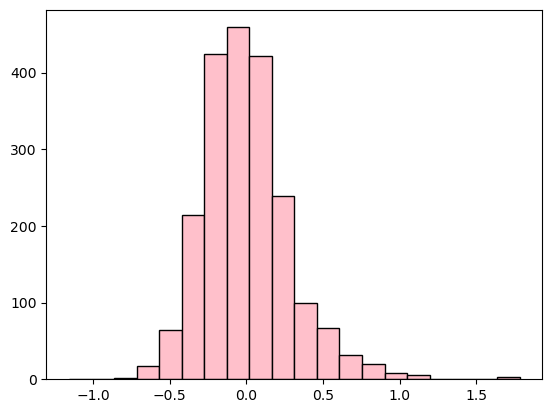

In [81]:
plt.hist(m2.resid, color = 'pink', bins = 20, edgecolor='black')
# plt.savefig('resid_hist.png')
plt.show()

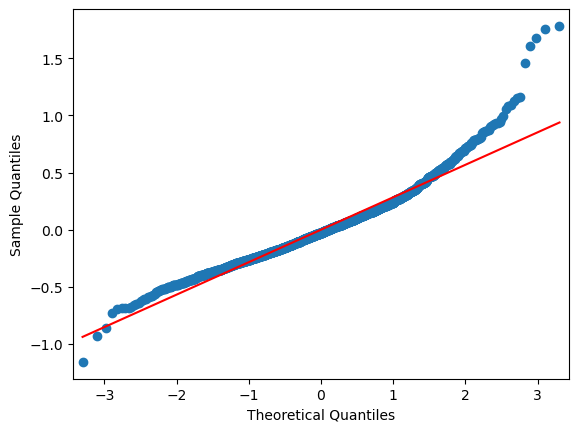

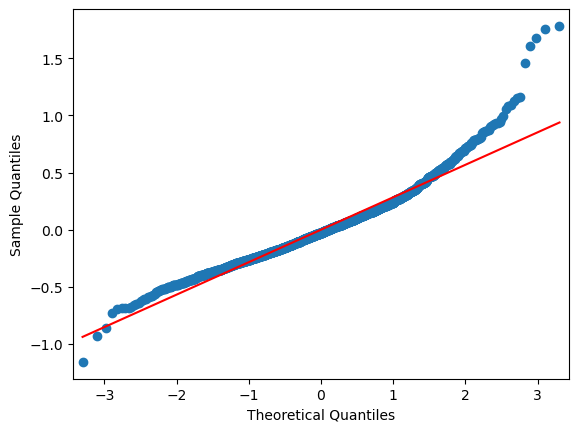

In [82]:
sm.qqplot(m2.resid, line='r')

##### TEST JARQUE-BERA

In [83]:
# rozkład normalny resz
stats.jarque_bera(m2.resid)

SignificanceResult(statistic=1244.3806316455575, pvalue=6.111940877341494e-271)

p-value < 0.1 zatem odrzucamy H0 o rozkładzie normalnym reszt

dla dużej próby, 2080 obesrwacji nie powoduje to komplikacji

## Analiza obserwacji nietypowych

In [84]:
plt.rc('figure', figsize = (12,8))

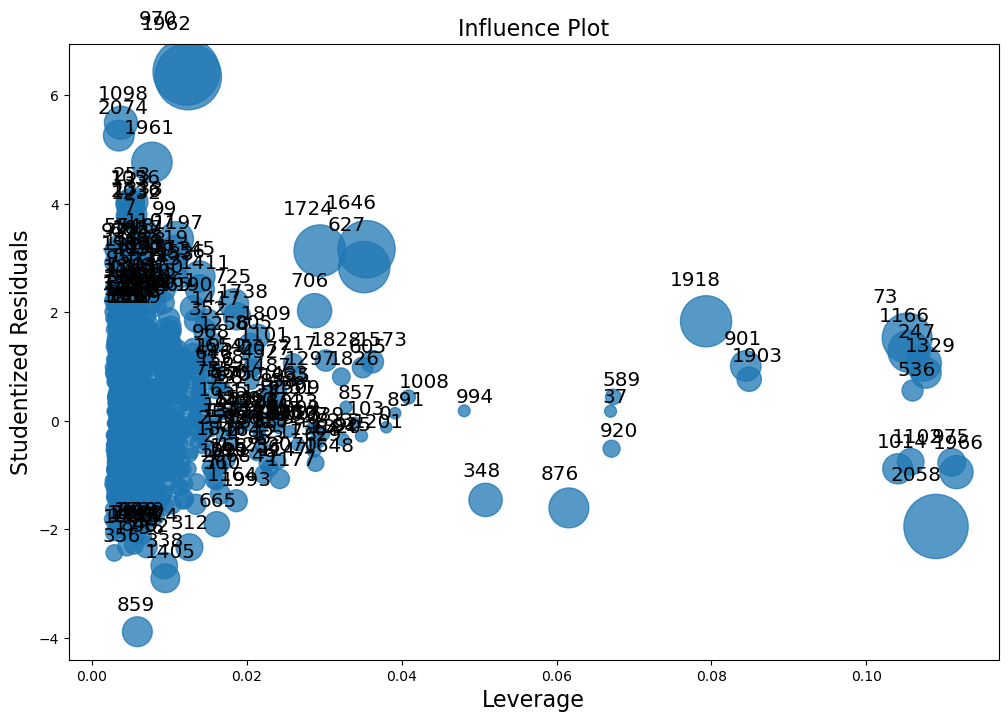

In [85]:
sm.graphics.influence_plot(m4, criterion = 'Cooks')
plt.show()

In [86]:
h_granica = 2*len(m2.params)/m2.nobs
h_granica #to jest granica dla dźwigni

0.016346153846153847

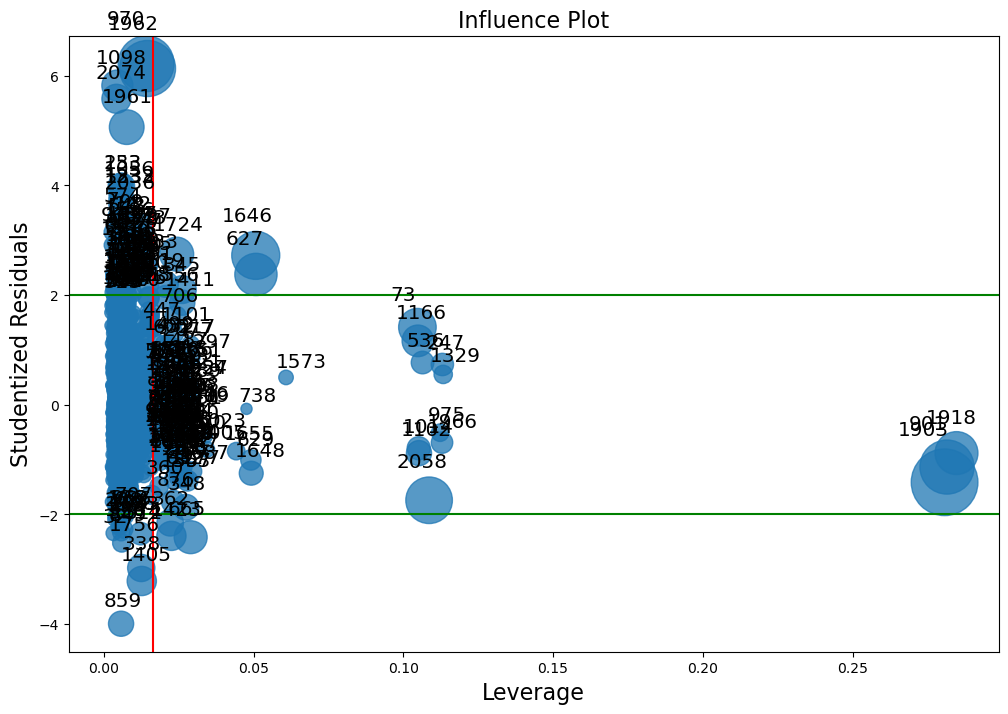

In [87]:
sm.graphics.influence_plot(m2, criterion='Cooks')
plt.axvline(x=h_granica, color='red')
plt.axhline(y=2, color = 'green')
plt.axhline(y=-2, color = 'green')
pt.savefig('inf_plot.png')
plt.show() #to co jest po prawej stronie od linii czerwonej oraz poniżej/powyżej zielonej linii to obserwacje odstające, nietypowe

In [88]:
#brak obserwacji odstających

In [89]:
df['odleglosc cooka']=m2.get_influence().cooks_distance[0]

In [90]:
df[df['odleglosc cooka'] > 4/m2.nobs].sort_values(by = 'odleglosc cooka', ascending=False)

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,lnglat2,lnglatdist,metro_dist2,metroxdist,bedxcapacity,distll,guest_satisfaction_overall2,cleanliness_rating2,clrat_gusaov,odleglosc cooka
1903,0,1,2.0,0,0,0,6.0,20.0,1,8.145038,...,67258.340497,0.006863,0.473892,5.607026,2.0,2112.351427,400.0,36.0,120.0,0.045981
1962,0,0,6.0,0,1,0,10.0,100.0,3,2.980742,...,65791.224004,0.000000,4.157890,6.078002,18.0,764.554286,10000.0,100.0,1000.0,0.032179
970,0,0,6.0,0,1,0,10.0,100.0,3,2.980734,...,65791.224004,0.000000,4.157976,6.078049,18.0,764.552244,10000.0,100.0,1000.0,0.031992
901,0,1,2.0,0,0,0,6.0,20.0,1,8.145037,...,67258.340497,0.006863,0.473907,5.607118,2.0,2112.351187,400.0,36.0,120.0,0.029856
1646,0,1,2.0,0,0,0,4.0,47.0,1,3.809656,...,64180.812969,0.001314,0.174479,1.591319,2.0,965.135617,2209.0,16.0,188.0,0.023215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,0,1,4.0,1,0,0,10.0,99.0,1,3.240908,...,66957.535938,0.001431,4.138250,6.592879,4.0,838.622464,9801.0,100.0,990.0,0.001961
1655,0,0,2.0,0,0,0,9.0,100.0,1,8.256634,...,62520.379127,0.004772,15.693998,32.709193,2.0,2064.494958,10000.0,81.0,900.0,0.001957
1631,0,1,2.0,0,1,0,10.0,100.0,1,1.016528,...,65474.432245,0.000226,0.320437,0.575427,2.0,260.108830,10000.0,100.0,1000.0,0.001954
975,1,0,4.0,0,1,0,8.0,84.0,1,9.401665,...,67807.233104,0.009165,0.410477,6.023504,4.0,2448.176776,7056.0,64.0,672.0,0.001951


In [91]:
#odległości Cooka nie bardzo wysokie i tylko 4% wszystkich obserwacji

## Analiza problemu współliniowości.

In [92]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [93]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lSum   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:16:02   Log-Likelihood:                -379.76
No. Observations:                2080   AIC:                             793.5
Df Residuals:                    2063   BIC:                             889.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1974.5431    222.869      8.860      0.000    1537.472    2411.614
room_shared                    -0.5878      0.094     -6.279      0.000      -0.771      -0.404
room_private                   -0.3543      0.015    -23.983      0.000      -0.383      -0.325
person_capacity                 0.1272      0.012     11.042      0.000       0.105       0.150
multi                          -0.0272      0.015     -1.844      0.065      -0.056       0.002
guest_satisfaction_overall     -0.0269      0.006     -4.386      0.000      -0.039      -0.015
dist                            0.8676      0.491      1.768      0.077      -0.095       1.830
metro_dist                     -0.0526      0.013     -4.182      0.000      -0.077      -0.028
lng                            12.4707      6.557      1.902      0.057      -0.389      25.330
weekend                         0.0687      0.013      5.310      0.000       0.043       0.094
lnglat                        -15.6541      1.744     -8.975      0.000     -19.075     -12.233
lngdist                        -8.0479      1.041     -7.732      0.000     -10.089      -6.007
lnglat2                         0.0302      0.003      8.815      0.000       0.023       0.037
lnglatdist                     40.0746     12.168      3.293      0.001      16.211      63.938
bedxcapacity                    0.0401      0.003     12.524      0.000       0.034       0.046
distll                         -0.0038      0.002     -2.005      0.045      -0.008   -8.36e-05
guest_satisfaction_overall2     0.0002   3.68e-05      5.215      0.000       0.000       0.000
==============================================================================
Omnibus:                      410.573   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1244.381
Skew:                           1.000   Prob(JB):                    6.11e-271
Kurtosis:                       6.218   Cond. No.                     2.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
m2.params.index

Index(['Intercept', 'room_shared', 'room_private', 'person_capacity', 'multi',
       'guest_satisfaction_overall', 'dist', 'metro_dist', 'lng', 'weekend',
       'lnglat', 'lngdist', 'lnglat2', 'lnglatdist', 'bedxcapacity', 'distll',
       'guest_satisfaction_overall2'],
      dtype='object')

In [95]:
zmienne = ['room_shared', 'room_private', 'person_capacity', 'multi',
       'guest_satisfaction_overall', 'dist', 'metro_dist', 'lng', 'weekend',
       'lnglat', 'lngdist', 'lnglat2', 'lnglatdist', 'bedxcapacity', 'distll',
       'guest_satisfaction_overall2']

In [96]:
get_vif(zmienne, df)

,VIF,Tolerance
room_shared,1.025211,0.975409
room_private,1.322651,0.756057
person_capacity,3.458987,0.289102
multi,1.084019,0.922493
guest_satisfaction_overall,37.004234,0.027024
dist,25535.208261,0.000039
metro_dist,2.677580,0.373472
lng,1577.108172,0.000634
weekend,1.019812,0.980573
lnglat,300595.400272,0.000003


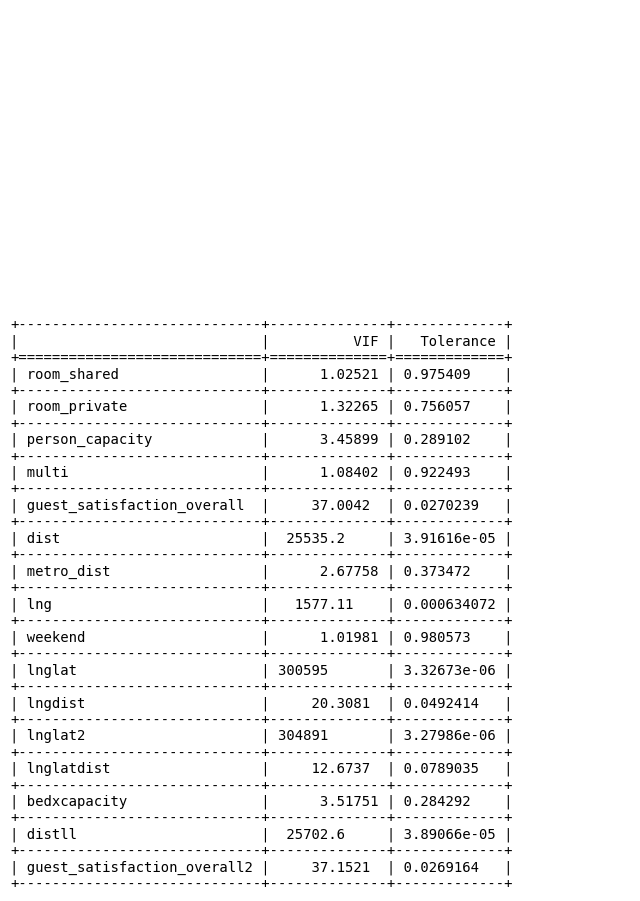

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Załóżmy, że masz już tabelę wyników VIF
vif_results = get_vif(zmienne, df)

# Formatowanie tabeli za pomocą tabulate
table_str = tabulate(vif_results, headers='keys', tablefmt='grid')

# Tworzenie obiektu subplots
fig, ax = plt.subplots(figsize=(8, 4)) 

# Ukrycie osi
ax.axis('off')

# Dodanie sformatowanej tabeli do subplota
ax.text(0, 0, table_str, fontsize=10, va='top', family='monospace')

# Zapisanie obrazu do pliku PNG
plt.savefig('vif_to_png.png', bbox_inches='tight', pad_inches=0.5)
plt.show()